Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale
%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_spmv_int.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

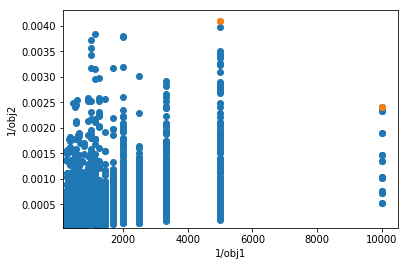

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


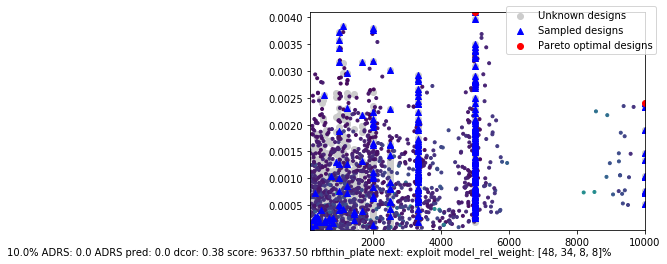

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 897, 2635, 1695,  963,  906, 2195, 2200, 1561, 2779, 2293, 2793,
       1585, 3010, 2482,    9, 2860, 2505, 2502, 2211, 1346,  144,    5,
        150,  146,   79,  145,  147,  468,  461,  148,    0,  149,  301,
        501,  628, 2125, 2213, 2121, 2186, 2133,  136,    1, 2191, 1963,
        302,  151,  140,  300,  152,  626,  303,   10, 2126,  135,  141,
        153,    6,  183,   40,  637,  635,  460,  627,    7, 2192,   15,
        138,  632, 2190,  307,  306, 1902,  118,   33,  188, 1114,  469,
       1895,  592,  467, 1102, 1292, 1896,    8,  634,  466, 2105,   44,
          3,  308,  304,  464,  305, 2849,  130, 1349,  126,  137, 1323,
          4,  143,    2,  119,  186,  465,  121,  123,  124,  191,  584,
         87,  120, 1958, 1331,  131,  127,  142,  139,  455,   46,  457,
        636,  182,  629,  309,  291,  631,  633,  295,  290,  122, 2206,
        187, 1426,  462,  294,  129,  296,  189,   47,  463,  630,   41,
        128, 1342,  506,  588,  451,  622,  297, 11